In [11]:
import pandas as pd 
import numpy as np

In [3]:
d19 = pd.read_csv('https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/Leitos_SUS/Leitos_2019.csv', sep=',')
d20 = pd.read_csv('https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/Leitos_SUS/Leitos_2020.csv', sep=',')
d21 = pd.read_csv('https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/Leitos_SUS/Leitos_2021.csv', sep=',')

df = pd.concat([d19, d20, d21])


In [5]:
df.head()

,COMP,REGIAO,UF,MUNICIPIO,MOTIVO DESABILITACAO,CNES,NOME ESTABELECIMENTO,RAZAO SOCIAL,TP_GESTAO,CO_TIPO_UNIDADE,...,UTI ADULTO - EXIST,UTI ADULTO - SUS,UTI PEDIATRICO - EXIST,UTI PEDIATRICO - SUS,UTI NEONATAL - EXIST,UTI NEONATAL - SUS,UTI QUEIMADO - EXIST,UTI QUEIMADO - SUS,UTI CORONARIANA - EXIST,UTI CORONARIANA - SUS
0,201901,NORDESTE,PE,CABO DE SANTO AGOSTINHO,NaN,27,CASA DE SAUDE SANTA HELENA,CASA DE SAUDE E MATERNIDADE SANTA HELENA LTDA,M,5,...,0,0,0,0,0,0,0,0,0,0
1,201902,NORDESTE,PE,CABO DE SANTO AGOSTINHO,NaN,27,CASA DE SAUDE SANTA HELENA,CASA DE SAUDE E MATERNIDADE SANTA HELENA LTDA,M,5,...,0,0,0,0,0,0,0,0,0,0
2,201903,NORDESTE,PE,CABO DE SANTO AGOSTINHO,NaN,27,CASA DE SAUDE SANTA HELENA,CASA DE SAUDE E MATERNIDADE SANTA HELENA LTDA,M,5,...,0,0,0,0,0,0,0,0,0,0
3,201904,NORDESTE,PE,CABO DE SANTO AGOSTINHO,NaN,27,CASA DE SAUDE SANTA HELENA,CASA DE SAUDE E MATERNIDADE SANTA HELENA LTDA,M,5,...,0,0,0,0,0,0,0,0,0,0
4,201905,NORDESTE,PE,CABO DE SANTO AGOSTINHO,NaN,27,CASA DE SAUDE SANTA HELENA,CASA DE SAUDE E MATERNIDADE SANTA HELENA LTDA,M,5,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.columns

Index(['COMP', 'REGIAO', 'UF', 'MUNICIPIO', 'MOTIVO DESABILITACAO', 'CNES',
       'NOME ESTABELECIMENTO', 'RAZAO SOCIAL', 'TP_GESTAO', 'CO_TIPO_UNIDADE',
       'DS_TIPO_UNIDADE', 'NATUREZA_JURIDICA', 'DESC_NATUREZA_JURIDICA',
       'NO_LOGRADOURO', 'NU_ENDERECO', 'NO_COMPLEMENTO', 'NO_BAIRRO', 'CO_CEP',
       'NU_TELEFONE', 'NO_EMAIL', 'LEITOS EXISTENTE', 'LEITOS SUS',
       'UTI TOTAL - EXIST', 'UTI TOTAL - SUS', 'UTI ADULTO - EXIST',
       'UTI ADULTO - SUS', 'UTI PEDIATRICO - EXIST', 'UTI PEDIATRICO - SUS',
       'UTI NEONATAL - EXIST', 'UTI NEONATAL - SUS', 'UTI QUEIMADO - EXIST',
       'UTI QUEIMADO - SUS', 'UTI CORONARIANA - EXIST',
       'UTI CORONARIANA - SUS'],
      dtype='object')

In [12]:
df['DESC_NATUREZA_JURIDICA'].unique()

df['public'] = np.where(df['DESC_NATUREZA_JURIDICA'].str.contains('HOSPITAL_PUBLICO'), 1, 0)

<Axes: xlabel='COMP'>

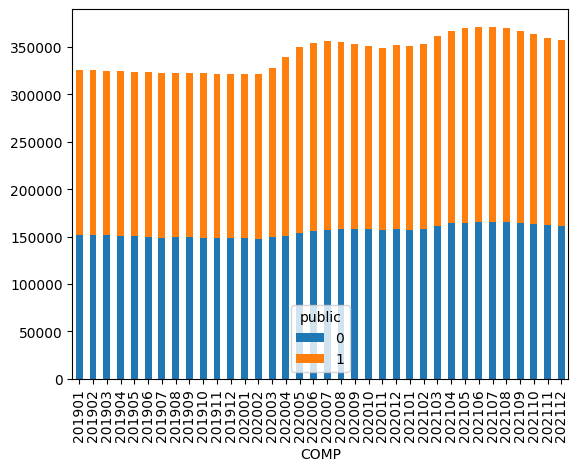

In [16]:
# Plot the change in the number of beds over time by hospital type
df.groupby(['COMP', 'public'])['LEITOS SUS'].sum().unstack().plot(kind='bar', stacked=True)

In [6]:
df.to_stata('leitos_sus.dta', write_index=False)


/var/folders/xd/gksdz50d7r3765bw8t_98y880000gn/T/ipykernel_57193/3083851471.py:1: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    MOTIVO DESABILITACAO   ->   MOTIVO_DESABILITACAO
    NOME ESTABELECIMENTO   ->   NOME_ESTABELECIMENTO
    RAZAO SOCIAL   ->   RAZAO_SOCIAL
    LEITOS EXISTENTE   ->   LEITOS_EXISTENTE
    LEITOS SUS   ->   LEITOS_SUS
    UTI TOTAL - EXIST   ->   UTI_TOTAL___EXIST
    UTI TOTAL - SUS   ->   UTI_TOTAL___SUS
    UTI ADULTO - EXIST   ->   UTI_ADULTO___EXIST
    UTI ADULTO - SUS   ->   UTI_ADULTO___SUS
    UTI PEDIATRICO - EXIST   ->   UTI_PEDIATRICO___EXIST
    UTI PEDIATRICO - SUS   ->   UTI_PEDIATRICO___SUS
    UTI NEONATAL - EXIST   ->   UTI_NEONATAL___EXIST
    UTI NEONATAL - SUS   ->   UTI_NEONATAL___SUS
    UTI QUEIMADO - EXIST   ->   UTI_QUEIMADO___EXIST
    UTI QUEIMADO - SUS   ->   UTI_QUEIMADO___SUS
    UTI CORONARIANA - EXIST   ->   UTI_CORONARIANA___EXIST
    UTI CORONAR